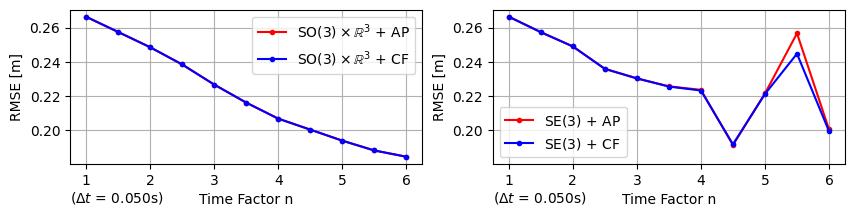

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = '/home/tmn/Documents/results/cmp4'
df_gptr = pd.read_csv(log_dir + '/gptrui.csv')
# df_spl = pd.read_csv('/home/kailai/Documents/results/cmp4/splineui.csv')

df_gptr.sort_values(by=['tskew', 'dt'], inplace=True)
# df_spl.sort_values(by=['tskew', 'dt'], inplace=True)

# dt0 = 0.01
df_gptr['m'] = df_gptr['dt']
df_gptr['n'] = df_gptr['tskew']
df_gptr['so3xr3_diff'] = df_gptr.apply(lambda x : x['so3xr3ap_rmse'] - x['so3xr3cf_rmse'], axis=1)
df_gptr['se3_diff'] = df_gptr.apply(lambda x : x['se3ap_rmse'] - x['se3cf_rmse'], axis=1)

# df_spl['m'] = df_spl['dt']
# df_spl['n'] = df_spl['tskew']

ns = sorted(list(set(df_gptr['n'].tolist())))
ms = sorted(list(set(df_gptr['m'].tolist())))

def plotAPCF(ax, dftemp, poseres, m):
    poseresmath = r'$\mathrm{SO}(3)\times\mathbb{R}^3$' if poseres.lower() == 'so3xr3' else '$\mathrm{SE}(3)$'
    ax.plot(
    dftemp["n"].to_numpy(), 
    np.array(dftemp[f"{poseres.lower()}ap_rmse"]) * 1,
    marker="o", markersize=3, linestyle="-", color='r', 
    label=f"{poseresmath} + AP"
    )
    ax.plot(
    dftemp["n"].to_numpy(), 
    np.array(dftemp[f"{poseres.lower()}cf_rmse"]) * 1,
    marker="o", markersize=3, linestyle="-", color='b', 
    label=f"{poseresmath} + CF"
    )
    # ax.plot(
    # dfspltemp["n"].to_numpy(), 
    # np.array(dfspltemp[f"{poseres.lower()}_rmse"]) * 1,
    # marker="o", markersize=3, linestyle="--", color='g', 
    # label=f"{poseresmath} + SPL"
    # )    
    ax.grid('on')
    ax.set_xlabel('Time Factor n')
    ax.set_ylabel('RMSE [m]')
    ax.legend()

for m in ms:
       
    dftemp = df_gptr[(df_gptr['m'] == m)]
    # dfspltemp = df_spl[(df_spl['m'] == m)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 2))
    plotAPCF(ax[0], dftemp, 'SO3xR3', m)
    plotAPCF(ax[1], dftemp, 'SE3', m)
    
    ylims = ax[0].get_ylim() + ax[1].get_ylim()
    ymin, ymax = min(ylims), max(ylims)
    
    ax[0].set_ylim([ymin, min(ymax, np.inf)])
    ax[1].set_ylim([ymin, min(ymax, np.inf)])
        
    ax[0].text(0, -0.25,  f'($\Delta t$ = {m:.3f}s)', transform=ax[0].transAxes)
    ax[1].text(0, -0.25,  f'($\Delta t$ = {m:.3f}s)', transform=ax[1].transAxes)
    
    
    plt.show()
    
